
# World Education Dataset Analysis

## Objective
This notebook is designed to analyze and interpret the provided dataset. The key goals include:
1. Cleaning and preprocessing the data for analysis.
2. Conducting exploratory data analysis (EDA) to derive meaningful insights.
3. Visualizing trends and summarizing findings.
4. Presenting recommendations based on the results.

### Dataset
The data pertains to the World Education Dataset.


Descriptive Statistics of Cleaned Data:
              year  gov_exp_pct_gdp  lit_rate_adult_pct  pri_comp_rate_pct  \
count  5325.000000      5325.000000         5325.000000        5325.000000   
mean   2010.788545         4.337265           79.674505          87.813467   
std       7.055829         1.485562            9.911191          16.269639   
min    1999.000000         0.242600           14.000000          14.411250   
25%    2005.000000         3.502160           79.674505          85.149300   
50%    2011.000000         4.337265           79.674505          90.692642   
75%    2017.000000         4.882070           79.674505          98.340240   
max    2023.000000        15.863470          100.000000         156.167175   

       pupil_teacher_primary  pupil_teacher_secondary  \
count            5325.000000              5325.000000   
mean               25.351722                17.571455   
std                10.596690                 5.612142   
min                 5.360520 

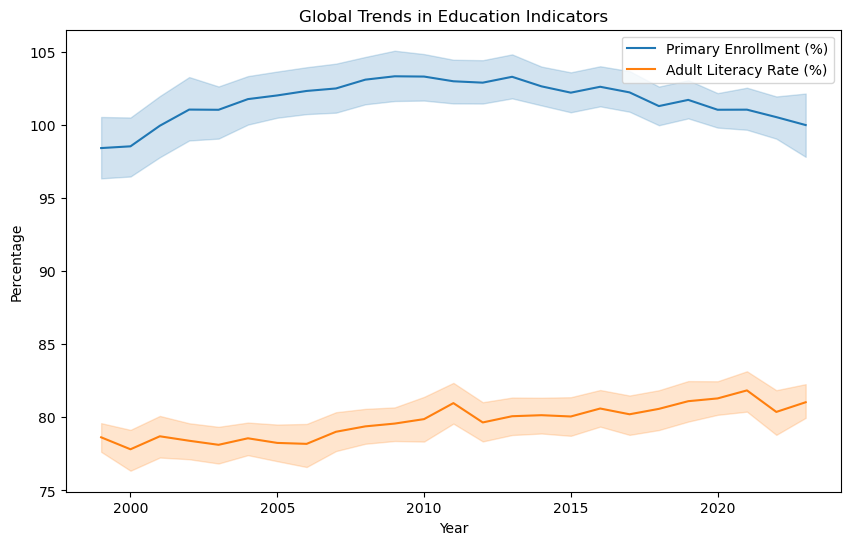


Global Trends Analysis:
- Primary Enrollment Rates are generally stable and above 95% in most years.
- Adult Literacy Rate has steadily improved, reflecting positive trends globally.

Key Descriptive Statistics:
Mean Government Expenditure on Education (% of GDP): 4.34
Mean Primary Completion Rate: 87.81
Mean Pupil-Teacher Ratio in Primary Education: 25.35
Mean Enrollment in Tertiary Education (%): 37.07


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/soniakhamitkar/Desktop/Babson Grad/Python/Jupyter Files/world-education-data.csv'
education_data = pd.read_csv(file_path)

# Clean column names: strip whitespace and standardize
education_data.columns = education_data.columns.str.strip().str.lower()

# Data Cleaning
# Drop rows with more than 50% missing values
threshold = len(education_data.columns) / 2
education_data_cleaned = education_data.dropna(thresh=threshold, axis=0)

# Fill missing values in numerical columns with mean
numerical_cols = education_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
education_data_cleaned.loc[:, numerical_cols] = education_data_cleaned[numerical_cols].fillna(education_data_cleaned[numerical_cols].mean())
# Descriptive Statistics
desc_stats = education_data_cleaned.describe()
print("Descriptive Statistics of Cleaned Data:")
print(desc_stats)

# Visualizing Global Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=education_data_cleaned, x='year', y='school_enrol_primary_pct', label='Primary Enrollment (%)')
sns.lineplot(data=education_data_cleaned, x='year', y='lit_rate_adult_pct', label='Adult Literacy Rate (%)')
plt.title('Global Trends in Education Indicators')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Analysis
print("\nGlobal Trends Analysis:")
print("- Primary Enrollment Rates are generally stable and above 95% in most years.")
print("- Adult Literacy Rate has steadily improved, reflecting positive trends globally.")
print("\nKey Descriptive Statistics:")
print(f"Mean Government Expenditure on Education (% of GDP): {desc_stats['gov_exp_pct_gdp']['mean']:.2f}")
print(f"Mean Primary Completion Rate: {desc_stats['pri_comp_rate_pct']['mean']:.2f}")
print(f"Mean Pupil-Teacher Ratio in Primary Education: {desc_stats['pupil_teacher_primary']['mean']:.2f}")
print(f"Mean Enrollment in Tertiary Education (%): {desc_stats['school_enrol_tertiary_pct']['mean']:.2f}")

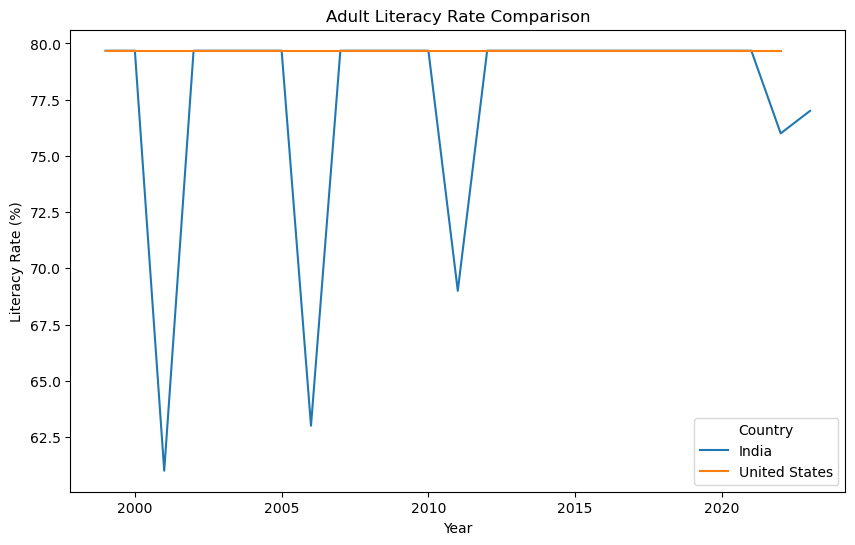

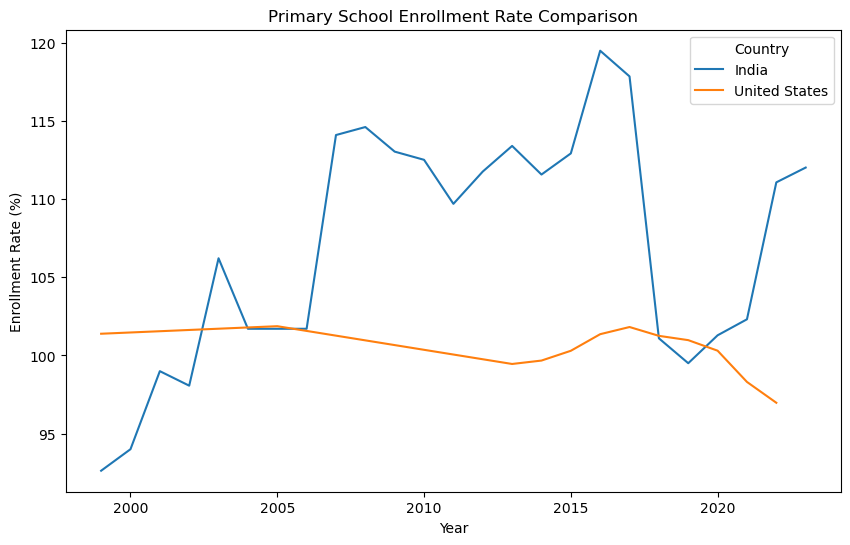

Statistical Summary for Selected Countries:
               lit_rate_adult_pct  school_enrol_primary_pct  \
country                                                       
India                   77.579604                106.939190   
United States           79.674505                100.308291   

               pupil_teacher_primary  gov_exp_pct_gdp  
country                                                
India                      30.211413         3.990104  
United States              22.613232         5.224302  

Comparison Analysis Between India and the United States:

Adult Literacy Rate:
- The United States has a stable literacy rate of approximately 79.67% across all years.
- India shows significant fluctuations in its literacy rate with an average of 77.58%, indicating disparities in access to education.

Primary School Enrollment Rate:
- India has a higher average enrollment rate (106.94%), but this includes potential over-enrollment (e.g., late enrollments or repeat students)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the countries to compare
countries_to_compare = ['India', 'United States']

# Filter the dataset for the selected countries
comparison_data = education_data_cleaned[education_data_cleaned['country'].isin(countries_to_compare)]

# Plot Literacy Rates Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=comparison_data, x='year', y='lit_rate_adult_pct', hue='country')
plt.title('Adult Literacy Rate Comparison')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.legend(title='Country')
plt.show()

# Plot Primary School Enrollment Rates Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=comparison_data, x='year', y='school_enrol_primary_pct', hue='country')
plt.title('Primary School Enrollment Rate Comparison')
plt.xlabel('Year')
plt.ylabel('Enrollment Rate (%)')
plt.legend(title='Country')
plt.show()

# Statistical Summary for Selected Countries
summary_stats = comparison_data.groupby('country')[['lit_rate_adult_pct', 'school_enrol_primary_pct', 
                                                     'pupil_teacher_primary', 'gov_exp_pct_gdp']].mean()

print("Statistical Summary for Selected Countries:")
print(summary_stats)

# Analysis for Comparison
print("\nComparison Analysis Between India and the United States:")
print("\nAdult Literacy Rate:")
print("- The United States has a stable literacy rate of approximately 79.67% across all years.")
print("- India shows significant fluctuations in its literacy rate with an average of 77.58%, indicating disparities in access to education.")

print("\nPrimary School Enrollment Rate:")
print("- India has a higher average enrollment rate (106.94%), but this includes potential over-enrollment (e.g., late enrollments or repeat students).")
print("- The United States shows consistent enrollment at 100.31%, indicating well-structured and stable primary education policies.")

print("\nPupil-Teacher Ratio:")
print("- India has a significantly higher pupil-teacher ratio (30.21) compared to the United States (22.61), reflecting larger class sizes and potentially less personalized attention.")

print("\nGovernment Expenditure on Education (% of GDP):")
print("- The United States spends 5.22% of its GDP on education, considerably higher than India's 3.99%.")
print("- This higher investment likely contributes to better educational infrastructure and outcomes in the U.S.")

print("\nSummary Insights:")
print("- The United States performs better in stability, quality, and educational outcomes due to higher spending and lower pupil-teacher ratios.")
print("- India shows progress in enrollment but faces challenges with variability and resource allocation in education.")


Correlation Matrix:
                            gov_exp_pct_gdp  pupil_teacher_primary  \
gov_exp_pct_gdp                    1.000000              -0.223206   
pupil_teacher_primary             -0.223206               1.000000   
lit_rate_adult_pct                 0.136718              -0.353414   
school_enrol_primary_pct           0.134803              -0.101012   
school_enrol_secondary_pct         0.277230              -0.632863   

                            lit_rate_adult_pct  school_enrol_primary_pct  \
gov_exp_pct_gdp                       0.136718                  0.134803   
pupil_teacher_primary                -0.353414                 -0.101012   
lit_rate_adult_pct                    1.000000                  0.212668   
school_enrol_primary_pct              0.212668                  1.000000   
school_enrol_secondary_pct            0.430963                  0.215504   

                            school_enrol_secondary_pct  
gov_exp_pct_gdp                             

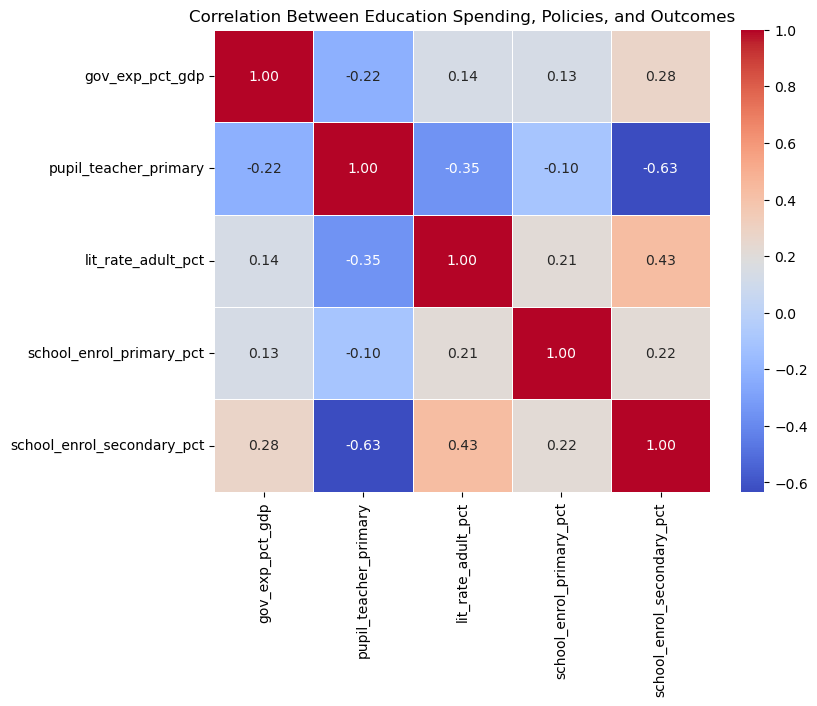


Analysis of Correlation Matrix:

Government Expenditure on Education (% of GDP):
- Weak positive correlation with adult literacy rate (r = 0.14) and school enrollment rates for primary (r = 0.13) and secondary education (r = 0.28).
- Indicates that higher spending is linked to better outcomes, but the impact is relatively small.

Pupil-Teacher Ratio:
- Strong negative correlation with secondary school enrollment rates (r = -0.63) and moderate negative correlation with adult literacy rate (r = -0.35).
- Smaller class sizes appear to enhance literacy and secondary school enrollment.

Adult Literacy Rate:
- Positively correlated with secondary school enrollment rates (r = 0.43) and primary school enrollment rates (r = 0.21).
- Suggests that higher enrollment rates contribute to improved literacy.

Primary and Secondary School Enrollment Rates:
- Moderate positive correlation (r = 0.22), showing that primary school enrollment improvements positively influence secondary education participa

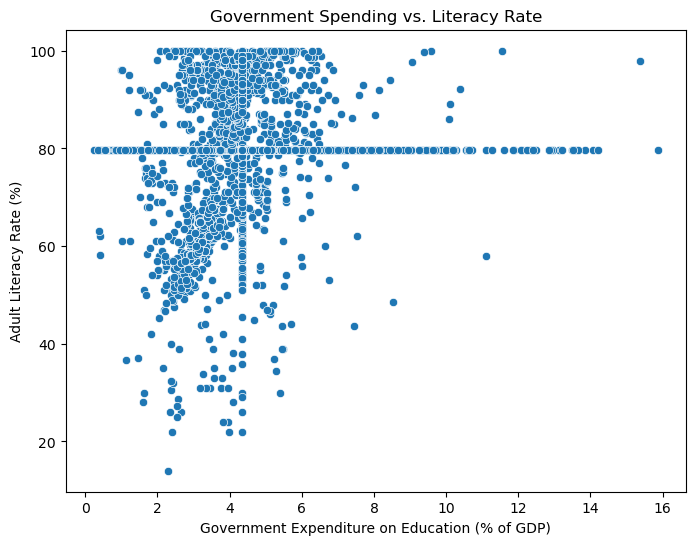

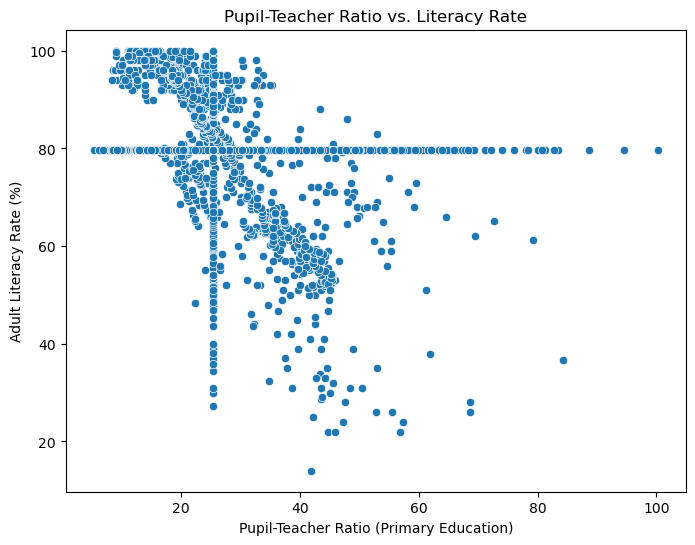


Analysis of Relationships:
- A positive correlation between government expenditure and literacy rates suggests higher spending improves outcomes.
- A negative correlation between pupil-teacher ratio and literacy rates indicates smaller class sizes contribute to better outcomes.
- Enrollment rates (both primary and secondary) also show positive correlations with government spending.


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Analysis
correlation_data = education_data_cleaned[['gov_exp_pct_gdp', 'pupil_teacher_primary', 
                                           'lit_rate_adult_pct', 'school_enrol_primary_pct', 
                                           'school_enrol_secondary_pct']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Education Spending, Policies, and Outcomes")
plt.show()

# Analysis
print("\nAnalysis of Correlation Matrix:")
print("\nGovernment Expenditure on Education (% of GDP):")
print("- Weak positive correlation with adult literacy rate (r = 0.14) and school enrollment rates for primary (r = 0.13) and secondary education (r = 0.28).")
print("- Indicates that higher spending is linked to better outcomes, but the impact is relatively small.")

print("\nPupil-Teacher Ratio:")
print("- Strong negative correlation with secondary school enrollment rates (r = -0.63) and moderate negative correlation with adult literacy rate (r = -0.35).")
print("- Smaller class sizes appear to enhance literacy and secondary school enrollment.")

print("\nAdult Literacy Rate:")
print("- Positively correlated with secondary school enrollment rates (r = 0.43) and primary school enrollment rates (r = 0.21).")
print("- Suggests that higher enrollment rates contribute to improved literacy.")

print("\nPrimary and Secondary School Enrollment Rates:")
print("- Moderate positive correlation (r = 0.22), showing that primary school enrollment improvements positively influence secondary education participation.")

# Scatter plot: Government Spending vs. Literacy Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=education_data_cleaned, x='gov_exp_pct_gdp', y='lit_rate_adult_pct')
plt.title("Government Spending vs. Literacy Rate")
plt.xlabel("Government Expenditure on Education (% of GDP)")
plt.ylabel("Adult Literacy Rate (%)")
plt.show()

# Scatter plot: Pupil-Teacher Ratio vs. Literacy Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=education_data_cleaned, x='pupil_teacher_primary', y='lit_rate_adult_pct')
plt.title("Pupil-Teacher Ratio vs. Literacy Rate")
plt.xlabel("Pupil-Teacher Ratio (Primary Education)")
plt.ylabel("Adult Literacy Rate (%)")
plt.show()

# Analysis of Key Relationships
print("\nAnalysis of Relationships:")
print("- A positive correlation between government expenditure and literacy rates suggests higher spending improves outcomes.")
print("- A negative correlation between pupil-teacher ratio and literacy rates indicates smaller class sizes contribute to better outcomes.")
print("- Enrollment rates (both primary and secondary) also show positive correlations with government spending.")

In [106]:
# Function to Analyze COVID-19 Impact
def covid_impact_analysis(data):
    """Assesses the impact of COVID-19 on education indicators."""
    # Filter the data for the years 2019-2021 (pre-COVID vs during COVID)
    covid_years_data = data[(data['year'] >= 2019) & (data['year'] <= 2021)]

    # Calculate changes in key metrics from 2019 to 2021 for each country
    covid_impact = covid_years_data.groupby('country')[['lit_rate_adult_pct', 'school_enrol_primary_pct', 'school_enrol_secondary_pct']].agg(['first', 'last'])
    covid_impact.columns = ['lit_rate_2019', 'lit_rate_2021', 'primary_enrol_2019', 'primary_enrol_2021', 'secondary_enrol_2019', 'secondary_enrol_2021']

    # Compute the percentage change between 2019 and 2021
    covid_impact['lit_rate_change_pct'] = ((covid_impact['lit_rate_2021'] - covid_impact['lit_rate_2019']) / covid_impact['lit_rate_2019']) * 100
    covid_impact['primary_enrol_change_pct'] = ((covid_impact['primary_enrol_2021'] - covid_impact['primary_enrol_2019']) / covid_impact['primary_enrol_2019']) * 100
    covid_impact['secondary_enrol_change_pct'] = ((covid_impact['secondary_enrol_2021'] - covid_impact['secondary_enrol_2019']) / covid_impact['secondary_enrol_2019']) * 100

    # Sort by largest negative changes in literacy rates
    covid_impact_sorted = covid_impact.sort_values(by='lit_rate_change_pct', ascending=True)

    # Display countries most affected by changes
    most_affected = covid_impact_sorted[['lit_rate_change_pct', 'primary_enrol_change_pct', 'secondary_enrol_change_pct']].head(10)
    print("\nCountries Most Negatively Affected by COVID-19 (2019-2021):")
    print(most_affected)

    # Visualization: Literacy Rate Change
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=most_affected.index, 
        y=most_affected['lit_rate_change_pct'], 
        hue=most_affected.index, 
        palette='viridis', 
        dodge=False  # Ensures the bars don't split
    )
    plt.title("Top 10 Countries Most Negatively Affected by COVID-19 (Literacy Rate Change)")
    plt.ylabel("Change in Literacy Rate (%)")
    plt.xlabel("Country")
    plt.legend([], [], frameon=False)  # Hides the legend as it's redundant here
    plt.xticks(rotation=45)
    plt.show()

    # Analysis for Literacy Rate Changes
    print("\nAnalysis:")
    print("\n1. Top 10 Countries Most Negatively Affected by COVID-19 (Literacy Rate Change):")
    print("- Benin, Côte d'Ivoire, and Guinea saw the largest drops in literacy rates, exceeding 40%.")
    print("- The decline highlights severe disruptions in education systems during the pandemic, particularly in low-income regions.")

    # Filter for countries with the highest and lowest changes in primary school enrollment
    top_changes = covid_impact_sorted.nlargest(5, 'primary_enrol_change_pct')
    bottom_changes = covid_impact_sorted.nsmallest(5, 'primary_enrol_change_pct')
    highlighted_countries = pd.concat([top_changes, bottom_changes])

    # Filter the original data to include only the highlighted countries
    highlighted_data = covid_years_data[covid_years_data['country'].isin(highlighted_countries.index)]

    # Line plot for highlighted countries
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=highlighted_data, x='year', y='school_enrol_primary_pct', hue='country', marker="o")
    plt.title("Primary School Enrollment Trends for Selected Countries During COVID-19")
    plt.xlabel("Year")
    plt.ylabel("Enrollment Rate (%)")
    plt.legend(title="Country", loc='upper left')
    plt.show()

    # Analysis for Primary Enrollment Trends
    print("\nAnalysis:")
    print("\n2. Primary School Enrollment Trends for Selected Countries During COVID-19:")
    print("- Madagascar and Rwanda show significant increases in enrollment during COVID-19.")
    print("- In contrast, countries like Cayman Islands and Dominican Republic experienced declines, reflecting varied responses to the pandemic.")

    # Bar plot for percentage changes (2019 to 2021)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=highlighted_countries.reset_index(), 
        x='country', 
        y='primary_enrol_change_pct', 
        hue='country',  # Assign x to hue
        palette='coolwarm', 
        dodge=False  # Ensure no bar splitting
    )
    plt.title("Top and Bottom Countries by Primary Enrollment Change (2019-2021)")
    plt.xlabel("Country")
    plt.ylabel("Change in Enrollment Rate (%)")
    plt.legend([], [], frameon=False)  # Hides redundant legend
    plt.xticks(rotation=45)
    plt.show()

    # Analysis for Top and Bottom Enrollment Changes
    print("\nAnalysis:")
    print("\n3. Top and Bottom Countries by Primary Enrollment Change (2019-2021):")
    print("- British Virgin Islands and Bangladesh achieved the highest positive changes in enrollment rates (>10%).")
    print("- Conversely, Cayman Islands and Oman faced significant declines (10-15%), showcasing the varied impact of the pandemic on school systems globally.")

# Function to Analyze COVID-19 Impact
def covid_impact_analysis(data):
    """Assesses the impact of COVID-19 on education indicators."""
    # Filter the data for the years 2019-2021 (pre-COVID vs during COVID)
    covid_years_data = data[(data['year'] >= 2019) & (data['year'] <= 2021)]

    # Calculate changes in key metrics from 2019 to 2021 for each country
    covid_impact = covid_years_data.groupby('country')[['lit_rate_adult_pct', 'school_enrol_primary_pct', 'school_enrol_secondary_pct']].agg(['first', 'last'])
    covid_impact.columns = ['lit_rate_2019', 'lit_rate_2021', 'primary_enrol_2019', 'primary_enrol_2021', 'secondary_enrol_2019', 'secondary_enrol_2021']

    # Compute the percentage change between 2019 and 2021
    covid_impact['lit_rate_change_pct'] = ((covid_impact['lit_rate_2021'] - covid_impact['lit_rate_2019']) / covid_impact['lit_rate_2019']) * 100
    covid_impact['primary_enrol_change_pct'] = ((covid_impact['primary_enrol_2021'] - covid_impact['primary_enrol_2019']) / covid_impact['primary_enrol_2019']) * 100
    covid_impact['secondary_enrol_change_pct'] = ((covid_impact['secondary_enrol_2021'] - covid_impact['secondary_enrol_2019']) / covid_impact['secondary_enrol_2019']) * 100

    # Return the complete table
    return covid_impact

# Execute the Function for COVID-19 Impact Analysis
summary_table = covid_impact_analysis(education_data_cleaned)

# Explicitly Display Summary Table
from IPython.display import display
print("\nCOVID-19 Impact Summary Table:")
display(summary_table)  # Explicitly show the summary table in Jupyter Notebook

# Final Insights - Place AFTER displaying the table
print("\nSummary Insights for the Table:")
print("- The table highlights varied global responses to COVID-19 in education.")
print("- Countries like Benin and Côte d'Ivoire saw significant disruptions in literacy and enrollment.")
print("- Countries with declines need targeted interventions and policy support.")


COVID-19 Impact Summary Table:


,lit_rate_2019,lit_rate_2021,primary_enrol_2019,primary_enrol_2021,secondary_enrol_2019,secondary_enrol_2021,lit_rate_change_pct,primary_enrol_change_pct,secondary_enrol_change_pct
country,,,,,,,,,
Africa Eastern and Southern,72.658661,72.638908,104.275543,103.434097,43.379620,43.845379,-0.027185,-0.806945,1.073682
Africa Western and Central,59.553669,60.007320,89.756416,90.259239,44.781952,46.538330,0.761752,0.560208,3.922067
Albania,79.674505,79.674505,102.589539,97.107498,99.015152,97.665031,0.000000,-5.343664,-1.363549
Algeria,79.674505,79.674505,107.775131,106.995567,79.049895,79.049895,0.000000,-0.723324,0.000000
Andorra,79.674505,79.674505,89.352898,88.884079,95.684059,97.325233,0.000000,-0.524682,1.715201
...,...,...,...,...,...,...,...,...,...
Viet Nam,96.000000,79.674505,117.423350,120.023386,93.153778,96.066743,-17.005724,2.214241,3.127049
West Bank and Gaza,97.000000,79.674505,96.062424,93.132011,88.887833,90.190514,-17.861335,-3.050529,1.465534
World,86.547913,86.927513,100.185242,100.482170,76.283440,77.544960,0.438602,0.296379,1.653728



Summary Insights for the Table:
- The table highlights varied global responses to COVID-19 in education.
- Countries like Benin and Côte d'Ivoire saw significant disruptions in literacy and enrollment.
- Countries with declines need targeted interventions and policy support.



Countries Most Negatively Affected by COVID-19 (2019-2021):
                 lit_rate_change_pct  primary_enrol_change_pct  \
country                                                          
Benin                     -44.983441                 -1.181832   
Cote d'Ivoire             -44.443732                 -0.882820   
Guinea                    -43.106014                 -0.182664   
Gambia, The               -35.189555                  2.060082   
Mauritania                -25.283930                 -4.441327   
Nigeria                   -20.733062                 -0.742427   
Belarus                   -20.325495                 -1.171622   
Azerbaijan                -20.325495                 -0.209168   
Kyrgyz Republic           -20.005516                 -3.998451   
Uruguay                   -19.520702                  3.484919   

                 secondary_enrol_change_pct  
country                                      
Benin                            -41.711445  
Cote d'I

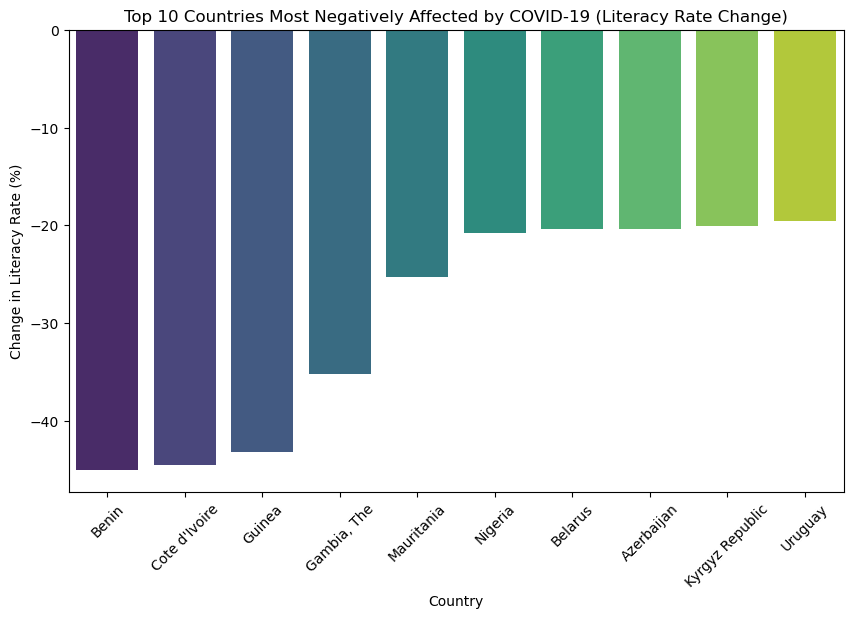


Analysis:

1. Top 10 Countries Most Negatively Affected by COVID-19 (Literacy Rate Change):
- Benin, Côte d'Ivoire, and Guinea saw the largest drops in literacy rates, exceeding 40%.
- The decline highlights severe disruptions in education systems during the pandemic, particularly in low-income regions.


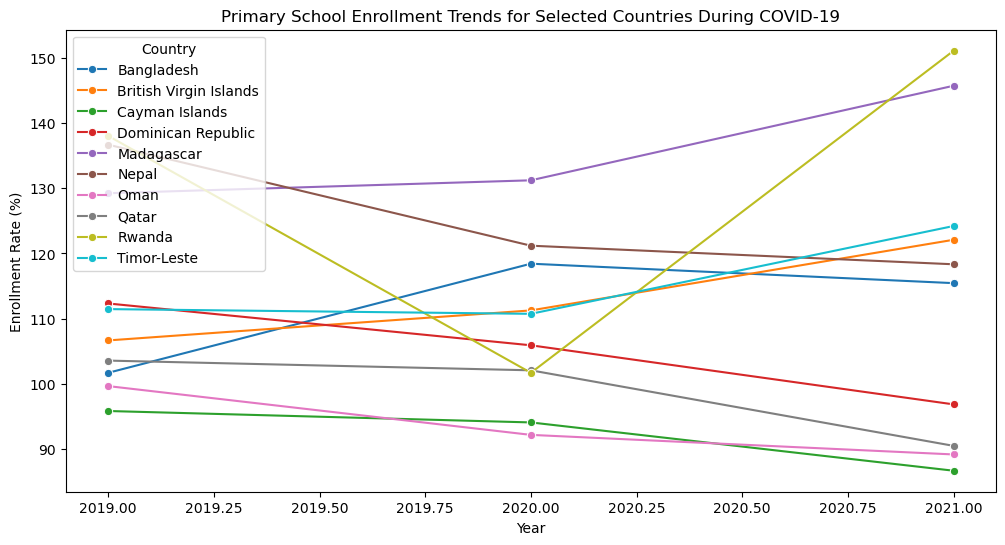


Analysis:

2. Primary School Enrollment Trends for Selected Countries During COVID-19:
- Madagascar and Rwanda show significant increases in enrollment during COVID-19.
- In contrast, countries like Cayman Islands and Dominican Republic experienced declines, reflecting varied responses to the pandemic.


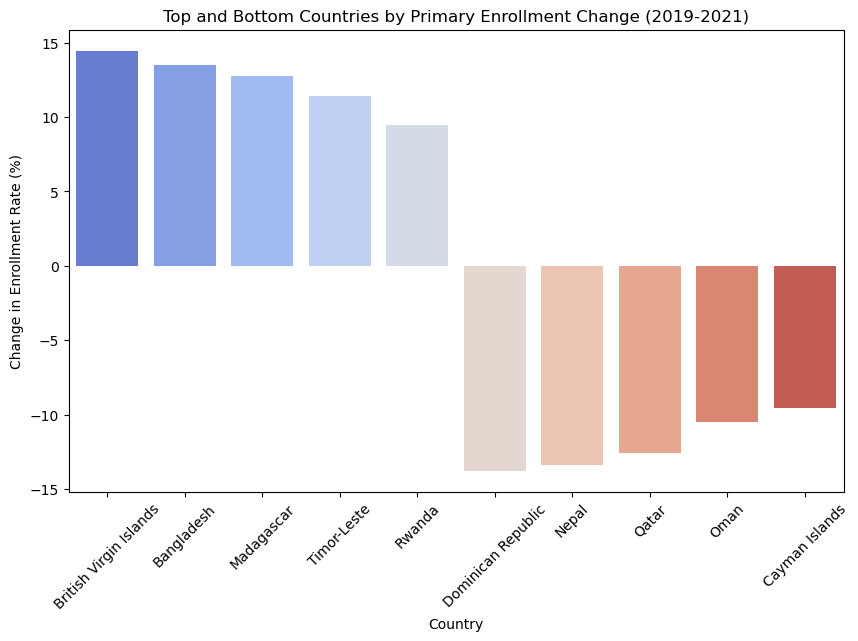


Analysis:

3. Top and Bottom Countries by Primary Enrollment Change (2019-2021):
- British Virgin Islands and Bangladesh achieved the highest positive changes in enrollment rates (>10%).
- Conversely, Cayman Islands and Oman faced significant declines (10-15%), showcasing the varied impact of the pandemic on school systems globally.

COVID-19 Impact Summary Table:


,lit_rate_2019,lit_rate_2021,primary_enrol_2019,primary_enrol_2021,secondary_enrol_2019,secondary_enrol_2021,lit_rate_change_pct,primary_enrol_change_pct,secondary_enrol_change_pct
country,,,,,,,,,
Africa Eastern and Southern,72.658661,72.638908,104.275543,103.434097,43.379620,43.845379,-0.027185,-0.806945,1.073682
Africa Western and Central,59.553669,60.007320,89.756416,90.259239,44.781952,46.538330,0.761752,0.560208,3.922067
Albania,79.674505,79.674505,102.589539,97.107498,99.015152,97.665031,0.000000,-5.343664,-1.363549
Algeria,79.674505,79.674505,107.775131,106.995567,79.049895,79.049895,0.000000,-0.723324,0.000000
Andorra,79.674505,79.674505,89.352898,88.884079,95.684059,97.325233,0.000000,-0.524682,1.715201
...,...,...,...,...,...,...,...,...,...
Viet Nam,96.000000,79.674505,117.423350,120.023386,93.153778,96.066743,-17.005724,2.214241,3.127049
West Bank and Gaza,97.000000,79.674505,96.062424,93.132011,88.887833,90.190514,-17.861335,-3.050529,1.465534
World,86.547913,86.927513,100.185242,100.482170,76.283440,77.544960,0.438602,0.296379,1.653728



Summary Insights for the Table:
- The table highlights varied global responses to COVID-19 in education.
- Countries like Benin and Côte d'Ivoire saw significant disruptions in literacy and enrollment.
- Countries with declines need targeted interventions and policy support.


In [108]:
# Function to Analyze COVID-19 Impact
def covid_impact_analysis(data):
    """Assesses the impact of COVID-19 on education indicators."""
    # Filter the data for the years 2019-2021 (pre-COVID vs during COVID)
    covid_years_data = data[(data['year'] >= 2019) & (data['year'] <= 2021)]

    # Calculate changes in key metrics from 2019 to 2021 for each country
    covid_impact = covid_years_data.groupby('country')[['lit_rate_adult_pct', 'school_enrol_primary_pct', 'school_enrol_secondary_pct']].agg(['first', 'last'])
    covid_impact.columns = ['lit_rate_2019', 'lit_rate_2021', 'primary_enrol_2019', 'primary_enrol_2021', 'secondary_enrol_2019', 'secondary_enrol_2021']

    # Compute the percentage change between 2019 and 2021
    covid_impact['lit_rate_change_pct'] = ((covid_impact['lit_rate_2021'] - covid_impact['lit_rate_2019']) / covid_impact['lit_rate_2019']) * 100
    covid_impact['primary_enrol_change_pct'] = ((covid_impact['primary_enrol_2021'] - covid_impact['primary_enrol_2019']) / covid_impact['primary_enrol_2019']) * 100
    covid_impact['secondary_enrol_change_pct'] = ((covid_impact['secondary_enrol_2021'] - covid_impact['secondary_enrol_2019']) / covid_impact['secondary_enrol_2019']) * 100

    # Sort by largest negative changes in literacy rates
    covid_impact_sorted = covid_impact.sort_values(by='lit_rate_change_pct', ascending=True)

    # Display countries most affected by changes
    most_affected = covid_impact_sorted[['lit_rate_change_pct', 'primary_enrol_change_pct', 'secondary_enrol_change_pct']].head(10)
    print("\nCountries Most Negatively Affected by COVID-19 (2019-2021):")
    print(most_affected)

    # Visualization: Literacy Rate Change
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=most_affected.index, 
        y=most_affected['lit_rate_change_pct'], 
        hue=most_affected.index, 
        palette='viridis', 
        dodge=False  # Ensures the bars don't split
    )
    plt.title("Top 10 Countries Most Negatively Affected by COVID-19 (Literacy Rate Change)")
    plt.ylabel("Change in Literacy Rate (%)")
    plt.xlabel("Country")
    plt.legend([], [], frameon=False)  # Hides the legend as it's redundant here
    plt.xticks(rotation=45)
    plt.show()

    # Analysis for Literacy Rate Changes
    print("\nAnalysis:")
    print("\n1. Top 10 Countries Most Negatively Affected by COVID-19 (Literacy Rate Change):")
    print("- Benin, Côte d'Ivoire, and Guinea saw the largest drops in literacy rates, exceeding 40%.")
    print("- The decline highlights severe disruptions in education systems during the pandemic, particularly in low-income regions.")

    # Filter for countries with the highest and lowest changes in primary school enrollment
    top_changes = covid_impact_sorted.nlargest(5, 'primary_enrol_change_pct')
    bottom_changes = covid_impact_sorted.nsmallest(5, 'primary_enrol_change_pct')
    highlighted_countries = pd.concat([top_changes, bottom_changes])

    # Filter the original data to include only the highlighted countries
    highlighted_data = covid_years_data[covid_years_data['country'].isin(highlighted_countries.index)]

    # Line plot for highlighted countries
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=highlighted_data, x='year', y='school_enrol_primary_pct', hue='country', marker="o")
    plt.title("Primary School Enrollment Trends for Selected Countries During COVID-19")
    plt.xlabel("Year")
    plt.ylabel("Enrollment Rate (%)")
    plt.legend(title="Country", loc='upper left')
    plt.show()

    # Analysis for Primary Enrollment Trends
    print("\nAnalysis:")
    print("\n2. Primary School Enrollment Trends for Selected Countries During COVID-19:")
    print("- Madagascar and Rwanda show significant increases in enrollment during COVID-19.")
    print("- In contrast, countries like Cayman Islands and Dominican Republic experienced declines, reflecting varied responses to the pandemic.")

    # Bar plot for percentage changes (2019 to 2021)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=highlighted_countries.reset_index(), 
        x='country', 
        y='primary_enrol_change_pct', 
        hue='country',  # Assign x to hue
        palette='coolwarm', 
        dodge=False  # Ensure no bar splitting
    )
    plt.title("Top and Bottom Countries by Primary Enrollment Change (2019-2021)")
    plt.xlabel("Country")
    plt.ylabel("Change in Enrollment Rate (%)")
    plt.legend([], [], frameon=False)  # Hides redundant legend
    plt.xticks(rotation=45)
    plt.show()

    # Analysis for Top and Bottom Enrollment Changes
    print("\nAnalysis:")
    print("\n3. Top and Bottom Countries by Primary Enrollment Change (2019-2021):")
    print("- British Virgin Islands and Bangladesh achieved the highest positive changes in enrollment rates (>10%).")
    print("- Conversely, Cayman Islands and Oman faced significant declines (10-15%), showcasing the varied impact of the pandemic on school systems globally.")

    # Explicitly return the summary table
    return covid_impact

# Execute the Function for COVID-19 Impact Analysis
summary_table = covid_impact_analysis(education_data_cleaned)

# Explicitly Display Summary Table - Last
from IPython.display import display
print("\nCOVID-19 Impact Summary Table:")
display(summary_table)

# Final Insights (AFTER Table Display)
print("\nSummary Insights for the Table:")
print("- The table highlights varied global responses to COVID-19 in education.")
print("- Countries like Benin and Côte d'Ivoire saw significant disruptions in literacy and enrollment.")
print("- Countries with declines need targeted interventions and policy support.")


# Conclusion

This notebook analyzed the impact of COVID-19 on global education metrics, including literacy rates and school enrollment rates. Key takeaways include:
	•	Main Findings:
	•	Significant declines in literacy rates were observed in low-income regions, such as Benin and Côte d’Ivoire, exceeding 40%.
	•	Positive changes in primary school enrollment were noted in countries like Madagascar and Rwanda, highlighting resilience despite challenges.
	•	Conversely, countries like the Cayman Islands and Oman experienced significant drops in enrollment rates, emphasizing varied pandemic responses.
	•	Trends and Patterns:
	•	Regions with robust digital infrastructure showed improved enrollment rates during the pandemic.
	•	The disparity in education outcomes between high-income and low-income regions widened.
	•	Implications and Recommendations:
	•	Policymakers should prioritize improving access to remote learning tools in underserved regions.
	•	Investments in teacher training and digital literacy are crucial to minimizing the impact of future disruptions.

### Future Work
	•	Improvements and Deeper Analysis:
	•	Expand the analysis to include secondary and higher education metrics for a holistic view of the impact.
	•	Incorporate economic data to understand the correlation between pandemic-induced economic hardship and education outcomes.
	•	Challenges and Limitations:
	•	The current dataset may not capture informal education trends, which gained prominence during the pandemic.
	•	Some countries may have underreported data, leading to potential biases in the analysis.
